In [1]:
import random

random.seed(10)
data = random.choices(population=list(range(10)), k=10)
print(data)

[5, 4, 5, 2, 8, 8, 6, 1, 5, 3]


In [2]:
# Alternatively:
import numpy as np

rng = np.random.default_rng(seed=10)
data2 = rng.integers(0, 24, size=(10))
print(data2)

[7 9 2 2 7 8 5 1 8 5]


In [3]:
import pandas as pd

df = pd.DataFrame(data=dict(
    date=pd.date_range(start="2018-01-01", periods=len(data)),
    close=data
))

In [4]:
# return the head or tail of a dataframe:
df.head()
# return the last rows, the tail, of a dataframe:
df.tail()
# print the full dataframe:
print(df)

        date  close
0 2018-01-01      5
1 2018-01-02      4
2 2018-01-03      5
3 2018-01-04      2
4 2018-01-05      8
5 2018-01-06      8
6 2018-01-07      6
7 2018-01-08      1
8 2018-01-09      5
9 2018-01-10      3


In [52]:
df.dtypes

date     datetime64[ns]
close             int64
dtype: object

In [53]:
# We can now save df to a CSV using the to_csv() method:
df.to_csv("data.csv", index=False)

In [39]:
%ls data.csv

data.csv


In [5]:
# read a csv file called data.csv:
df = pd.read_csv('data.csv', header=0)

In [6]:
df.dtypes

date     object
close     int64
dtype: object

In [68]:
df = pd.read_csv('data.csv', header=0, parse_dates=['date'])

In [69]:
df.dtypes

date     datetime64[ns]
close             int64
dtype: object

<AxesSubplot: xlabel='date'>

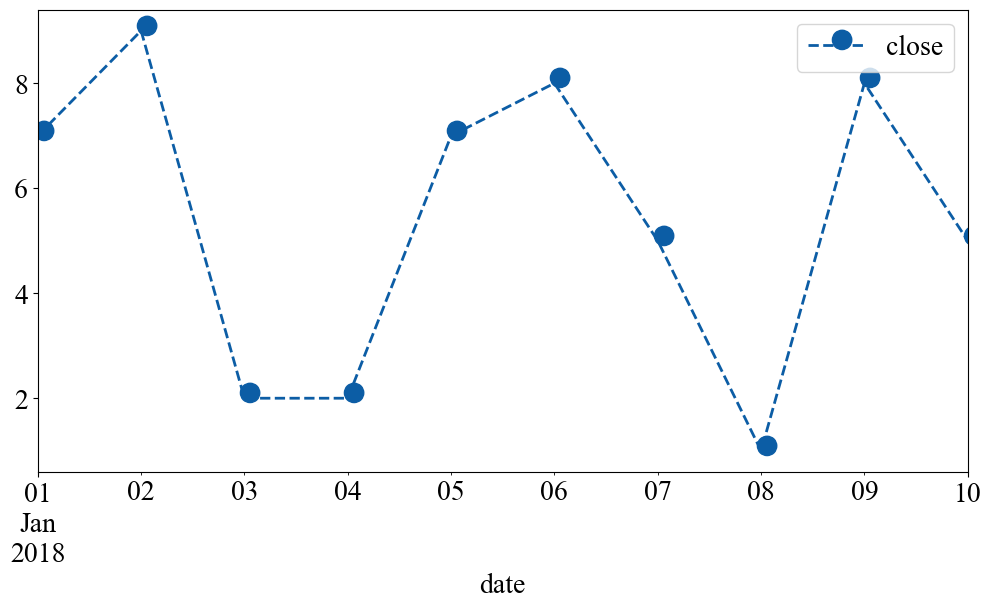

In [9]:
# plot two close against dates:
df.plot(x="date", y="close")

In [42]:
df.dtypes

Unnamed: 0     int64
date          object
close          int64
dtype: object

In [36]:
df.head().to_numpy()

array([[0, '2018-01-01', 7],
       [1, '2018-01-02', 9],
       [2, '2018-01-03', 2],
       [3, '2018-01-04', 2],
       [4, '2018-01-05', 7]], dtype=object)

In [64]:
df.set_index("date")["2018-01-01": "2018-01-02"]

,close
date,
2018-01-01,7
2018-01-02,9


In [66]:
df.date[0]

Timestamp('2018-01-01 00:00:00')

In [73]:
from datetime import datetime
now = datetime.now()
delta = datetime(2022, 1, 1) - datetime(2021, 1, 1)
print(now)
print(delta.days)

2023-06-01 14:09:57.445466
365


In [74]:
from datetime import datetime, timedelta
now = datetime.now()
one_week_later = now + timedelta(weeks=1)
print(one_week_later)

2023-06-08 14:21:00.283961


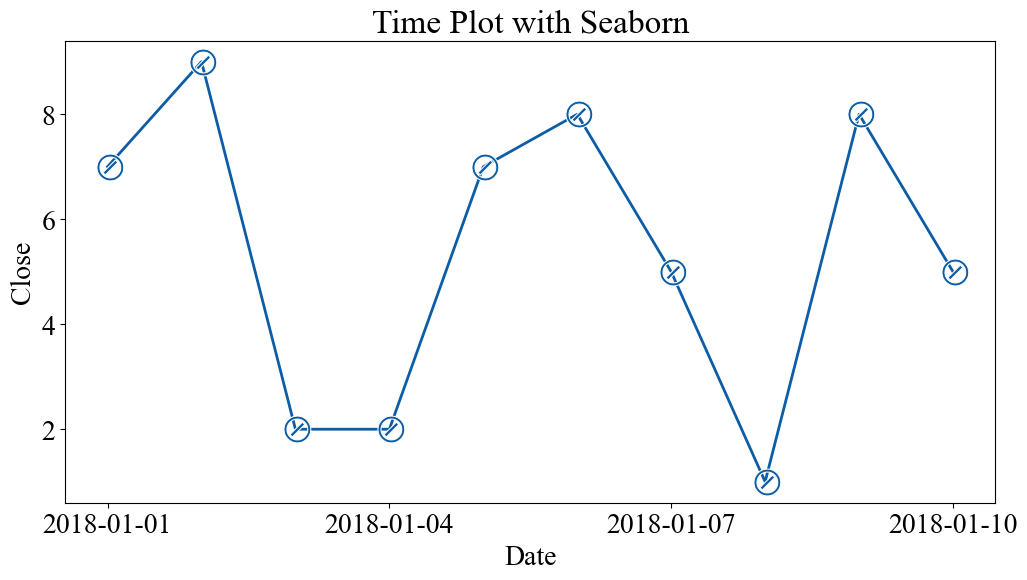

In [7]:
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

ax = sns.lineplot(x="date", y="close", data=df)
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Time Plot with Seaborn')
ax.xaxis.get_major_locator()
ax.xaxis.get_major_formatter()
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))

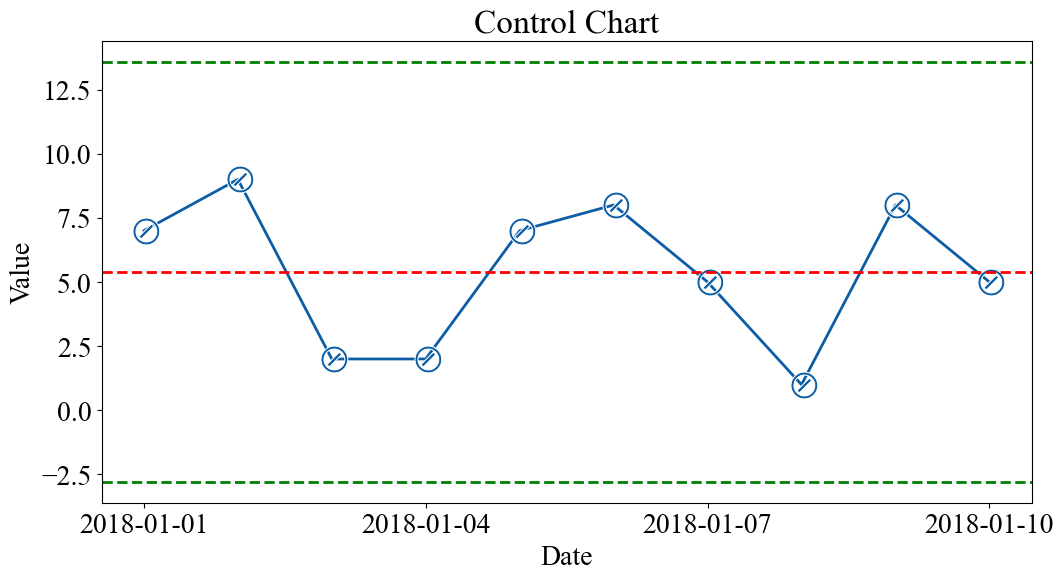

In [81]:
import numpy as np
import seaborn as sns
df = pd.read_csv("data.csv")
mean_value = np.mean(df['close'])
std_deviation = np.std(df['close'])
ax = sns.lineplot(x=df['date'], y=df['close'])
plt.axhline(mean_value, color='r', linestyle='--')
plt.axhline(
    mean_value + 3 * std_deviation, color='g', linestyle='--'
)
plt.axhline(
    mean_value - 3 * std_deviation, color='g', linestyle='--'
)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Control Chart')

ax.xaxis.get_major_locator()
ax.xaxis.get_major_formatter()
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))

In [84]:
import yfinance as yf
  
# Get the data for ticker symbol GOOGL:
df = yf.download('GOOGL', start='2018-01-01', end='2022-01-01')

[*********************100%***********************]  1 of 1 completed


<AxesSubplot: xlabel='Date', ylabel='Close'>

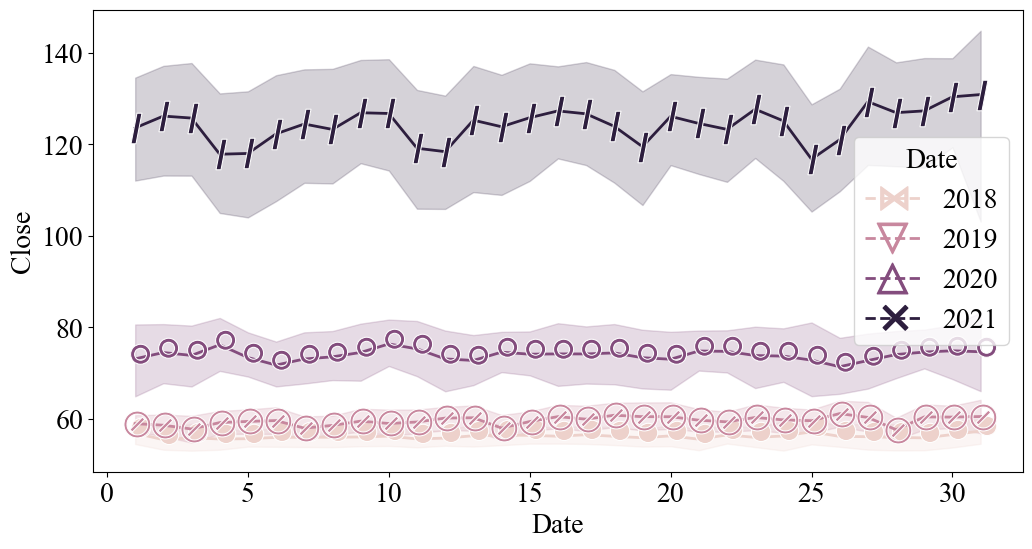

In [89]:
import statsmodels.api as sm

sns.lineplot(x=df.index.day, y=df.Close, hue=df.index.year)

In [136]:
plt.plot?

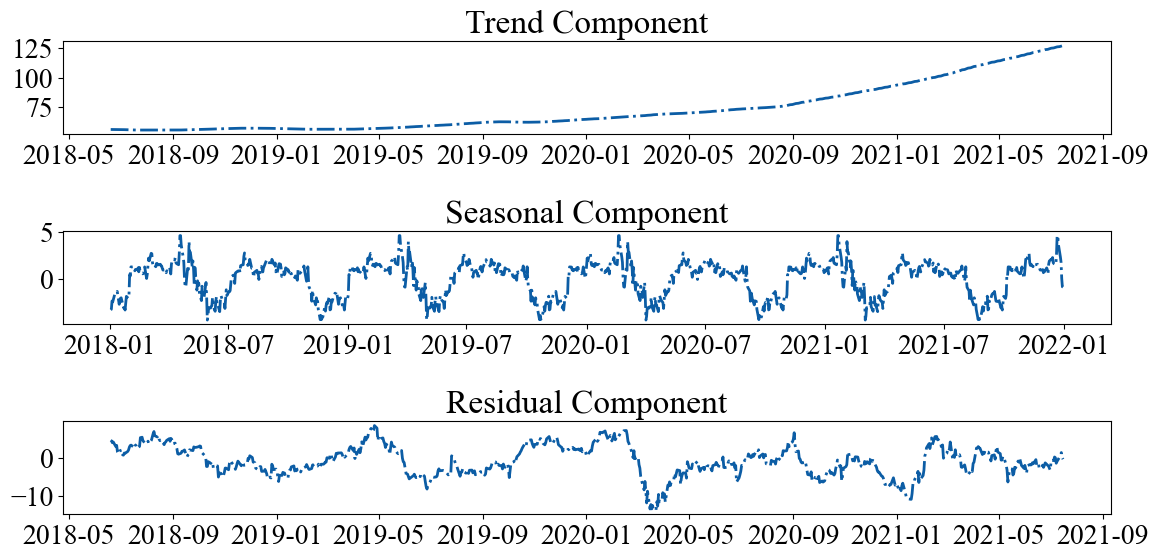

In [141]:
dec = sm.tsa.seasonal_decompose(
    #df["Close"],
    df.asfreq("B")["Close"].fillna(method="ffill"),
    model='additive',
    period=20*12
)
fig, axs = plt.subplots(3)
axs[0].plot(dec.trend, '-.')
axs[0].set(title="Trend Component")
axs[1].plot(dec.seasonal, '-.')
axs[1].set(title="Seasonal Component")
axs[2].plot(dec.resid, '-.')
axs[2].set(title="Residual Component")
# dec.plot();
plt.tight_layout()

Text(0.5, 1.0, 'Time Series Histogram')

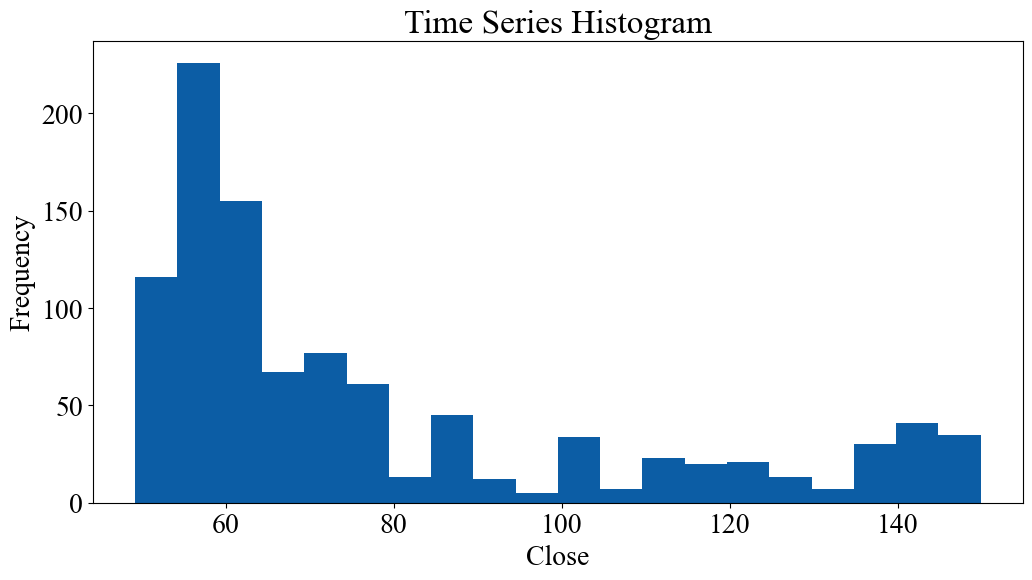

In [142]:
plt.hist(df['Close'], bins=20)
plt.xlabel('Close')
plt.ylabel('Frequency')
plt.title('Time Series Histogram')

Text(0.5, 1.0, 'Whisker Plot by Interval')

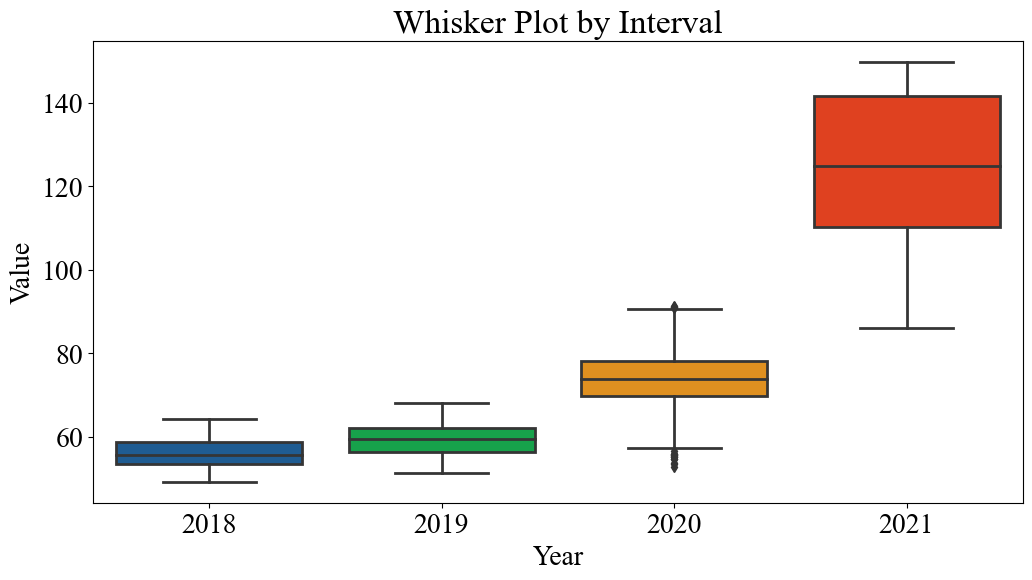

In [154]:
sns.boxplot(x=df.index.year, y='Close', data=df)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Whisker Plot by Interval')

In [180]:
ax.axline?

Text(0.5, 1.0, 'Lag Plot')

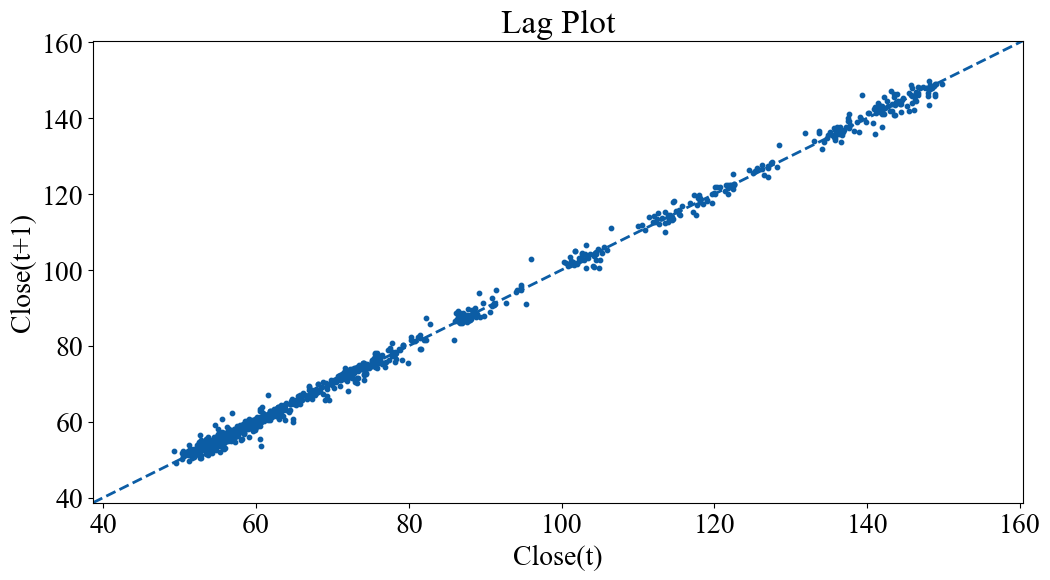

In [182]:
from pandas.plotting import lag_plot
ax = lag_plot(df['Close'], lag=1, s=10)
ax.axline(
    [ax.get_xlim()[0],ax.get_ylim()[0]],
    [ax.get_xlim()[1], ax.get_ylim()[1]],
)
plt.xlabel('Close(t)')
plt.ylabel('Close(t+1)')
plt.title('Lag Plot')

Text(0.5, 1.0, 'Lag Scatter Plot')

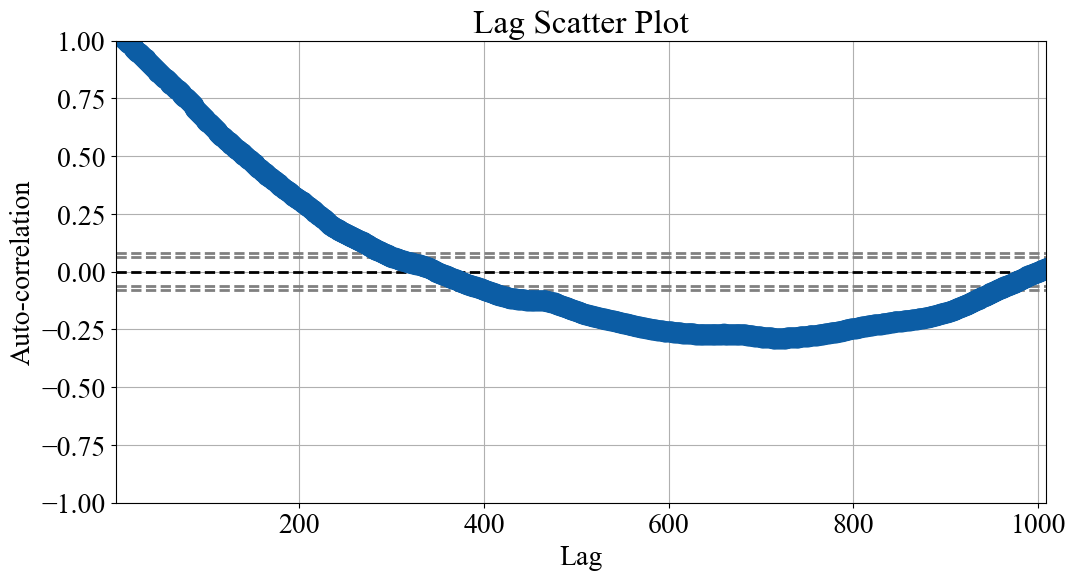

In [183]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Close'])
plt.xlabel('Lag')
plt.ylabel('Auto-correlation')
plt.title('Lag Scatter Plot')